In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Load the data
df = pd.read_csv('east_texas_reservoir.csv')
# set date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,reservoir_storage,conservation_storage,percent_full,conservation_capacity
date,,,,
1951-05-02,36370,36370,38.6,94250
1951-05-03,44540,44540,47.3,94250
1951-05-04,57400,57400,60.9,94250
1951-05-05,67400,67400,71.5,94250
1951-05-06,73250,73250,77.7,94250
...,...,...,...,...
2024-04-17,12644745,9559409,94.9,10074732
2024-04-18,12611447,9592145,95.2,10074732
2024-04-19,12595460,9620645,95.5,10074732


# Data Analysis

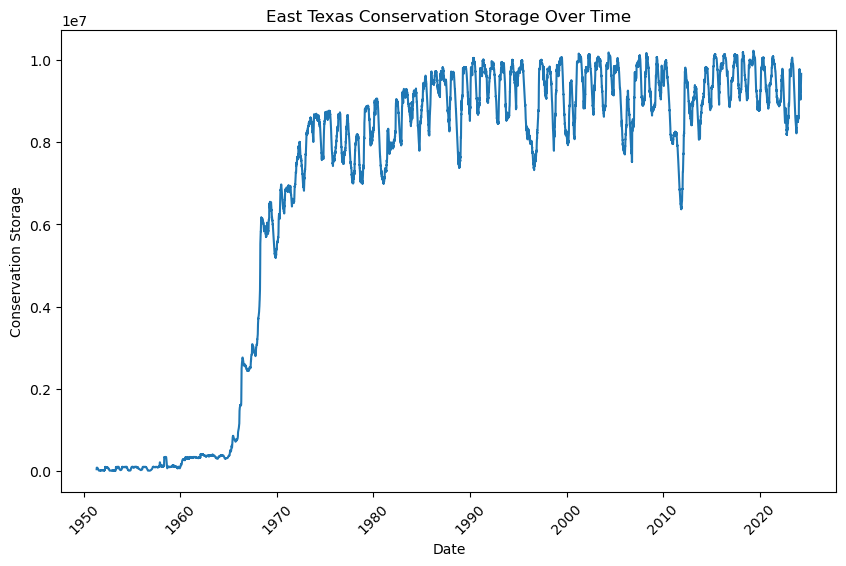

In [141]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='conservation_storage', data=df)
plt.title('East Texas Conservation Storage Over Time')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.xticks(rotation=45)
plt.show()

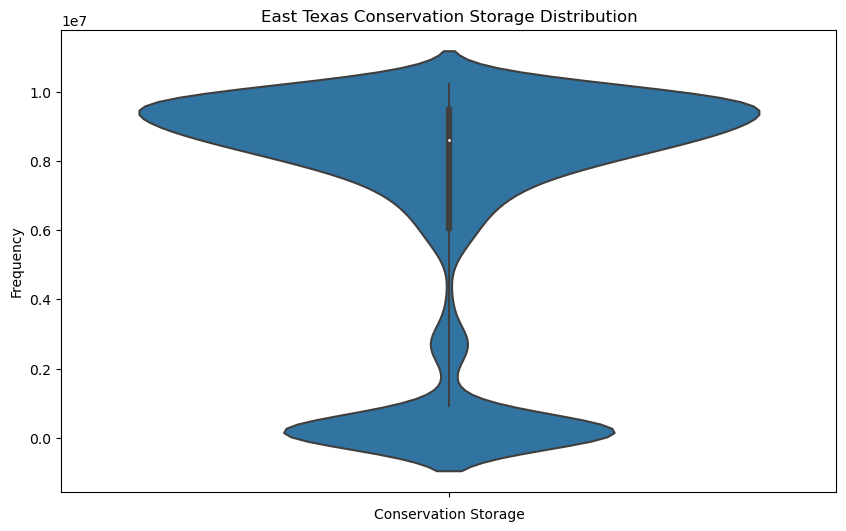

In [142]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(y='conservation_storage', data=df)
plt.title('East Texas Conservation Storage Distribution')
plt.xlabel('Conservation Storage')
plt.ylabel('Frequency')
plt.show()

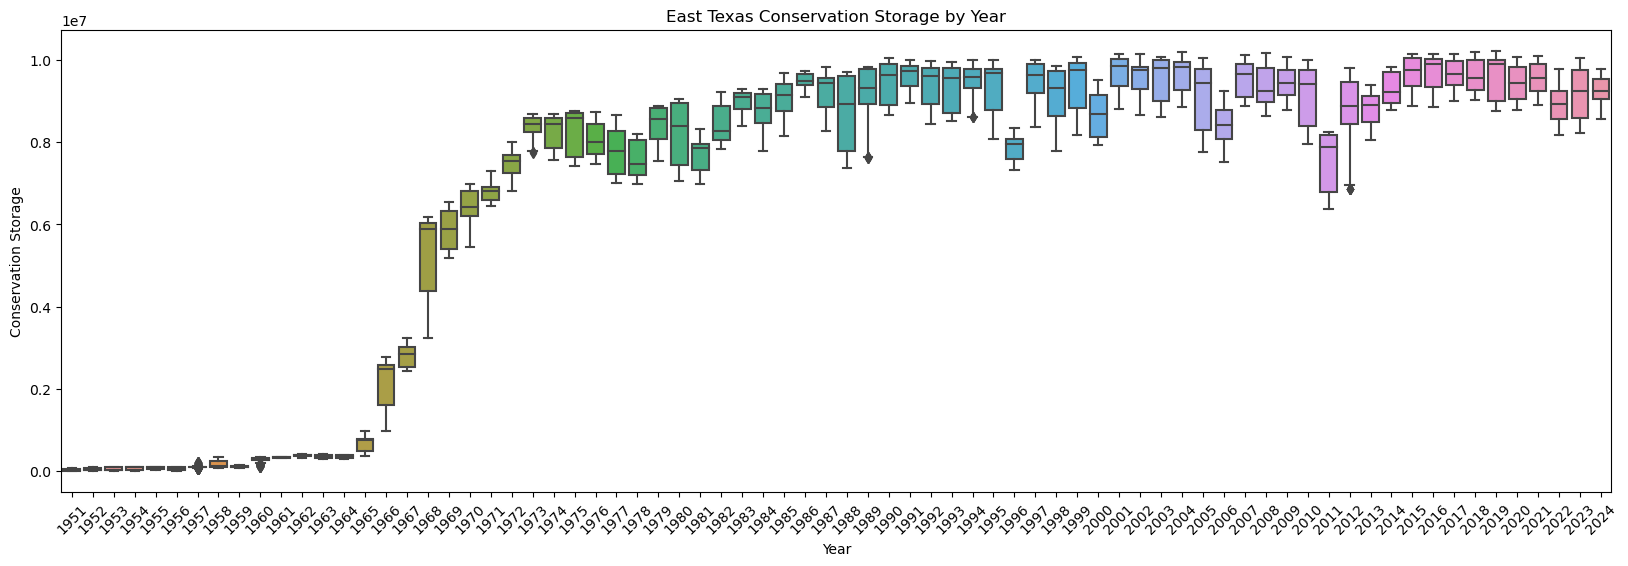

In [143]:
# box plot yearly
yearly_df = df.copy()
yearly_df['year'] = yearly_df.index.year
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='conservation_storage', data=yearly_df)
plt.title('East Texas Conservation Storage by Year')
plt.xlabel('Year')
plt.ylabel('Conservation Storage')
plt.xticks(rotation=45)
plt.show()

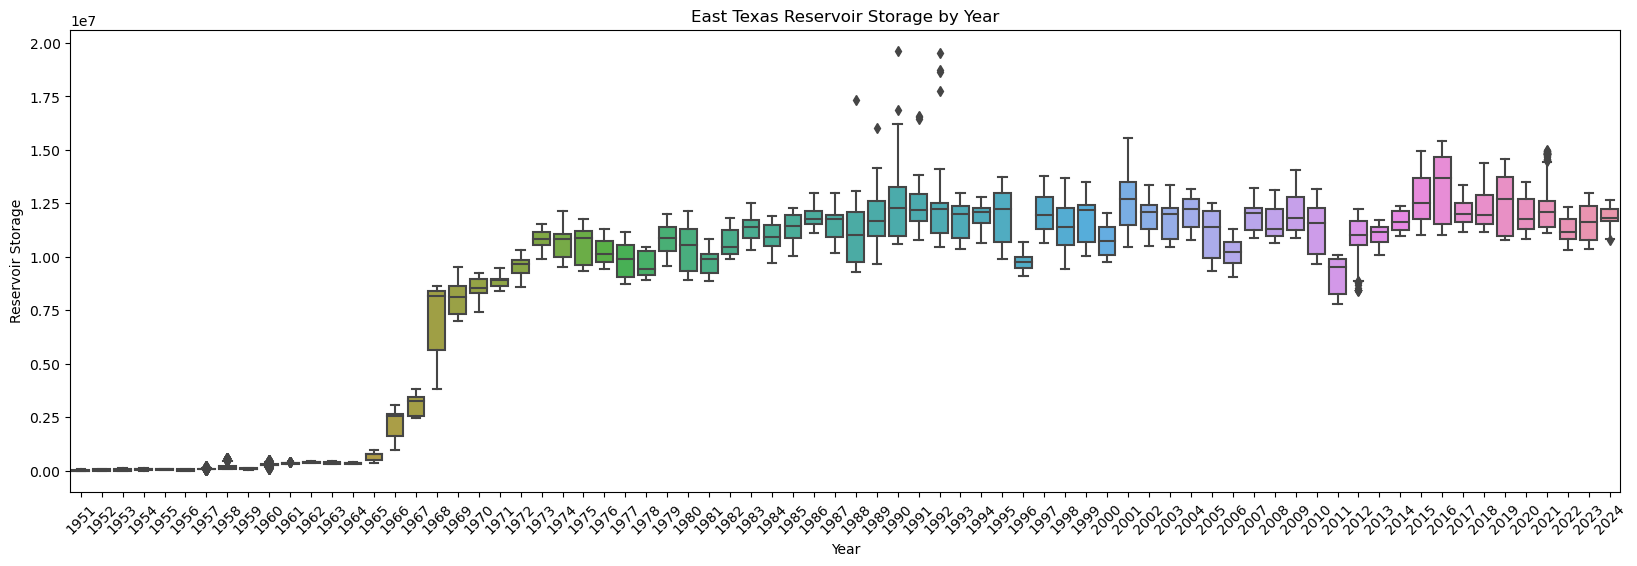

In [144]:
# box plot yearly
yearly_df = df.copy()
yearly_df['year'] = yearly_df.index.year
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='reservoir_storage', data=yearly_df)
plt.title('East Texas Reservoir Storage by Year')
plt.xlabel('Year')
plt.ylabel('Reservoir Storage')
plt.xticks(rotation=45)
plt.show()

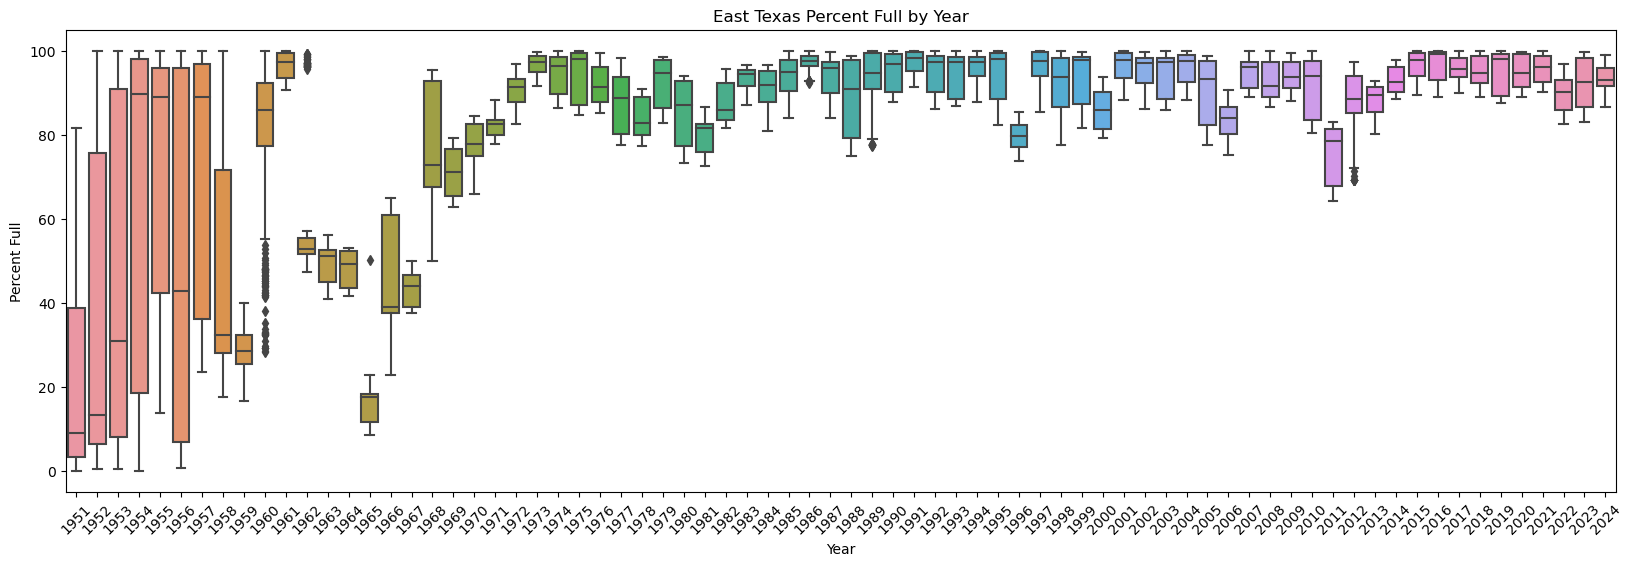

In [145]:
# box plot yearly
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='percent_full', data=yearly_df)
plt.title('East Texas Percent Full by Year')
plt.xlabel('Year')
plt.ylabel('Percent Full')
plt.xticks(rotation=45)
plt.show()

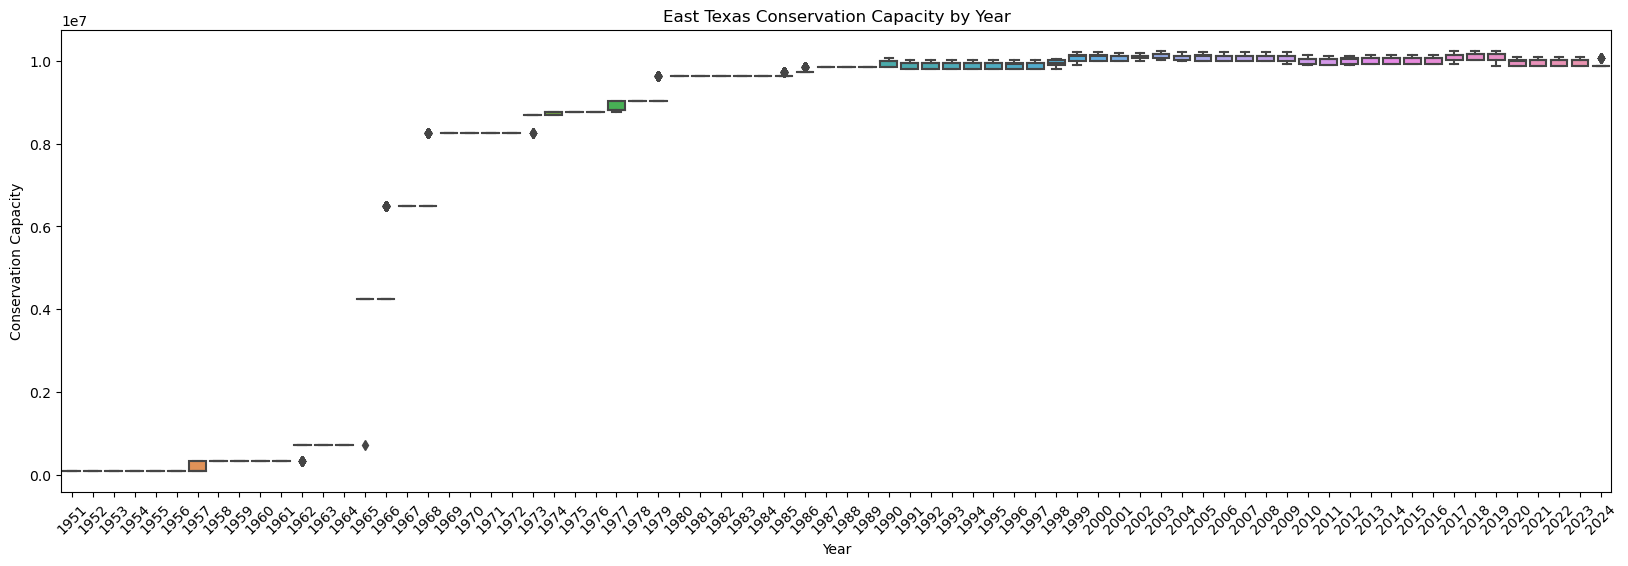

In [146]:
# box plot yearly
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='conservation_capacity', data=yearly_df)
plt.title('East Texas Conservation Capacity by Year')
plt.xlabel('Year')
plt.ylabel('Conservation Capacity')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

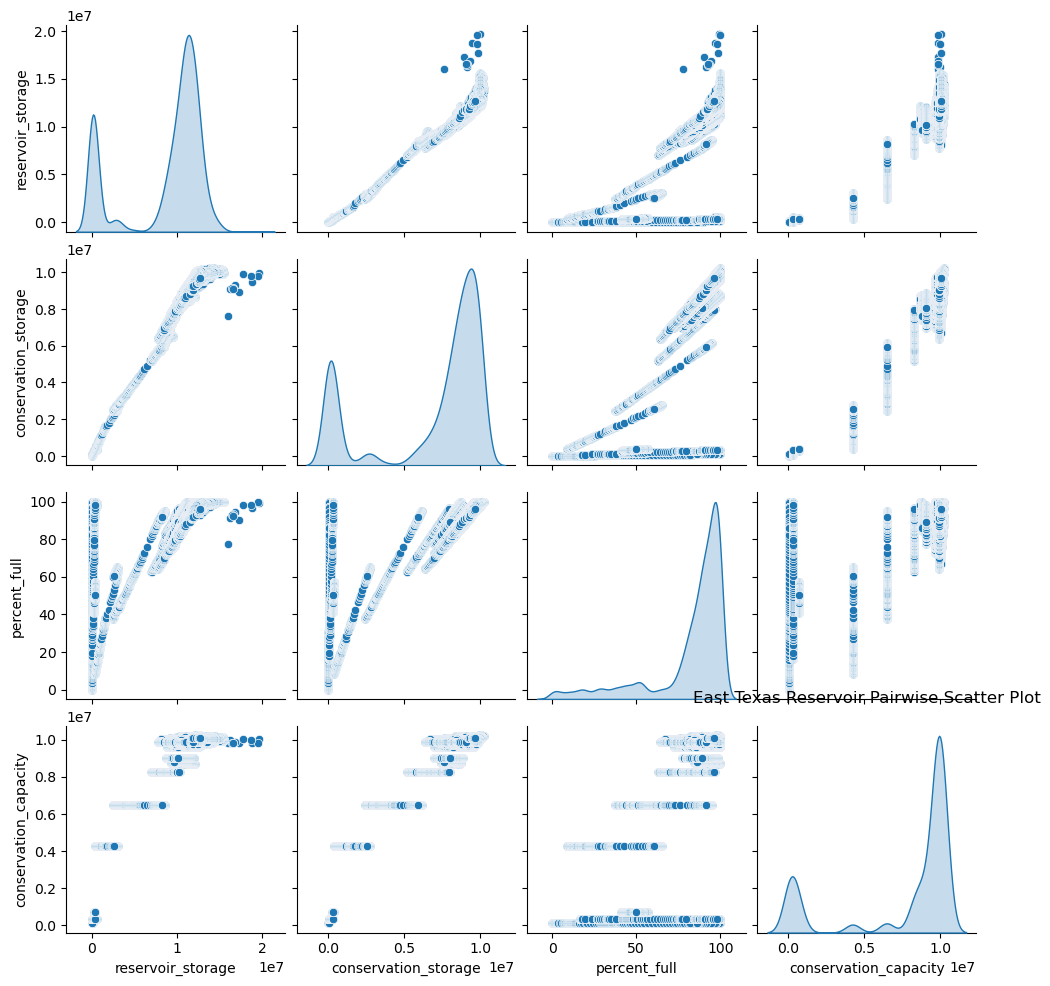

In [147]:
# pairwise scatter plot
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind='kde')
plt.title('East Texas Reservoir Pairwise Scatter Plot')
plt.show()

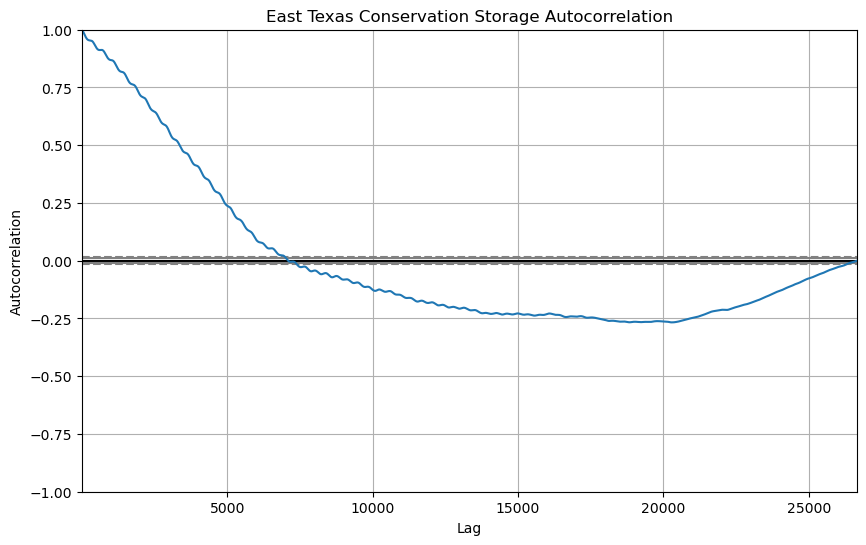

In [148]:
# autocorrelation plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['conservation_storage'])
plt.title('East Texas Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

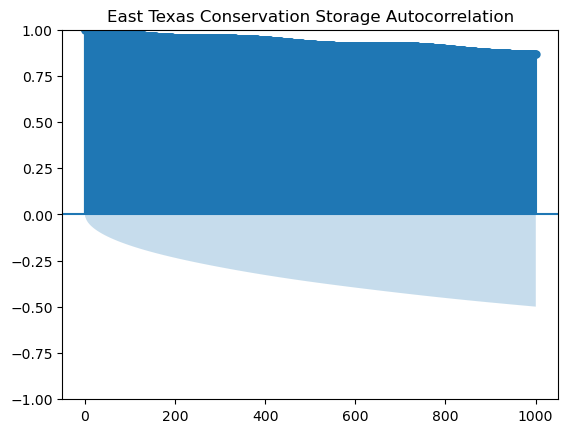

In [149]:
# acf plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(df['conservation_storage'], lags=1000)
plt.title('East Texas Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

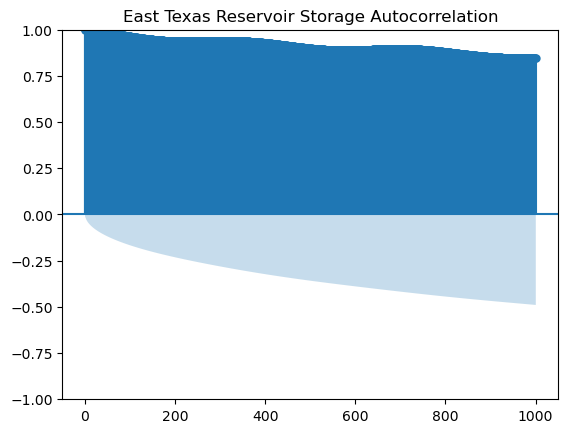

In [150]:
# acf plot of reservoir storage
plt.figure(figsize=(10, 6))
plot_acf(df['reservoir_storage'], lags=1000)
plt.title('East Texas Reservoir Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

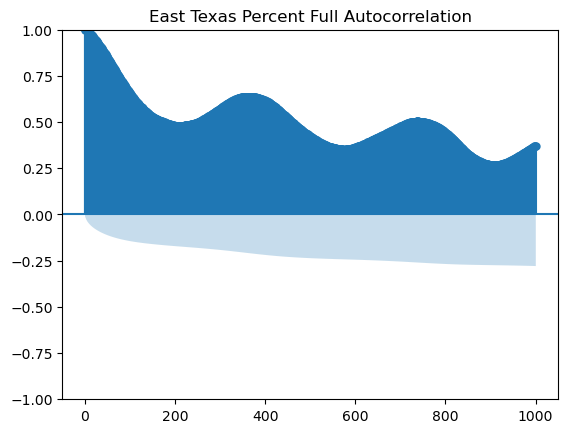

In [151]:
# acf plot of percent full
plt.figure(figsize=(10, 6))
plot_acf(df['percent_full'], lags=1000)
plt.title('East Texas Percent Full Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

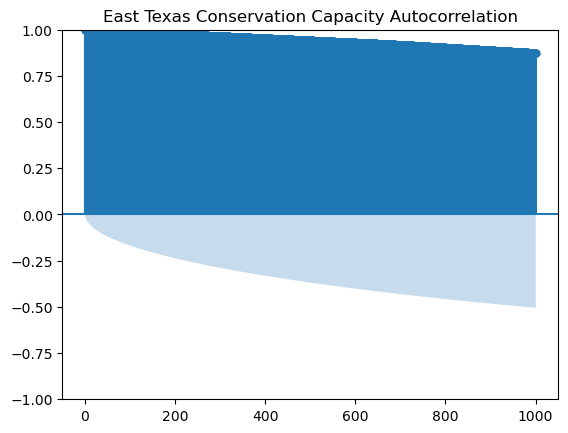

In [152]:
# acf plot of conservation capacity
plt.figure(figsize=(10, 6))
plot_acf(df['conservation_capacity'], lags=1000)
plt.title('East Texas Conservation Capacity Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

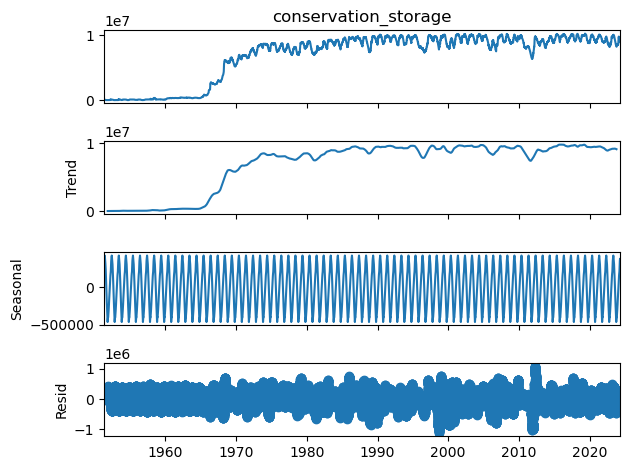

In [153]:
# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['conservation_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

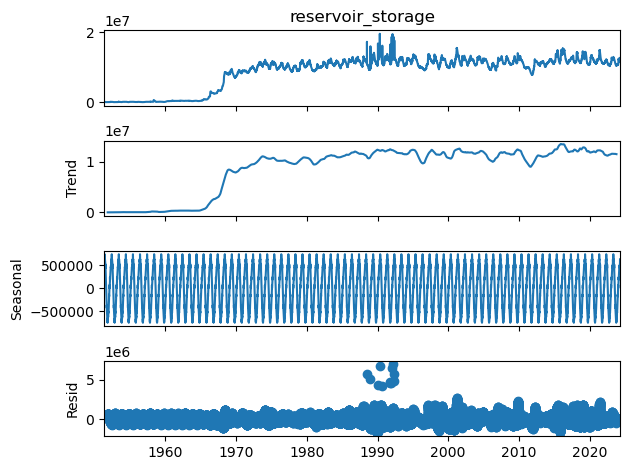

In [154]:
# seasonal decomposition for reservoir storage
decomposition = seasonal_decompose(df['reservoir_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

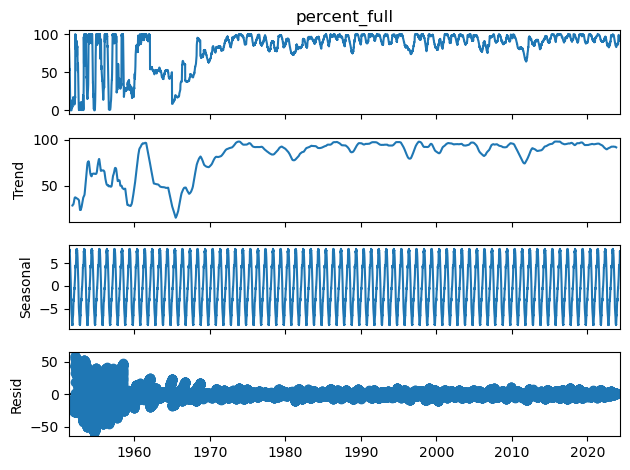

In [155]:
# seasonal decomposition for percent full
decomposition = seasonal_decompose(df['percent_full'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

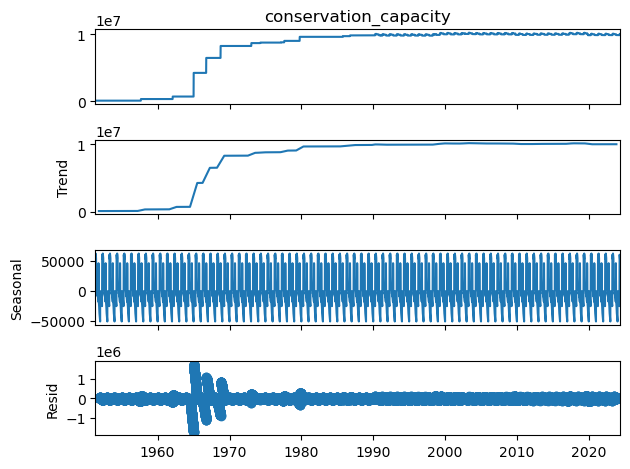

In [156]:
# seasonal decomposition for conservation capacity
decomposition = seasonal_decompose(df['conservation_capacity'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

# Prediction Model

In [157]:
# create 50 columns for each lag
for i in range(1, 24):
    df[f'conservation_storage_{i}'] = df['conservation_storage'].shift(i * 15)

# drop rows with NaN values
df.dropna(inplace=True)

In [158]:
df

,reservoir_storage,conservation_storage,percent_full,conservation_capacity,conservation_storage_1,conservation_storage_2,conservation_storage_3,conservation_storage_4,conservation_storage_5,conservation_storage_6,...,conservation_storage_14,conservation_storage_15,conservation_storage_16,conservation_storage_17,conservation_storage_18,conservation_storage_19,conservation_storage_20,conservation_storage_21,conservation_storage_22,conservation_storage_23
date,,,,,,,,,,,,,,,,,,,,,
1952-04-11,82760,82760,87.8,94250,80660.0,40440.0,10880.0,11490.0,12080.0,11300.0,...,17.0,14.0,18.0,742.0,11010.0,38930.0,50530.0,66440.0,76360.0,36370.0
1952-04-12,83130,83130,88.2,94250,80660.0,55880.0,10390.0,9080.0,11570.0,11510.0,...,74.0,13.0,18.0,473.0,9790.0,37230.0,49830.0,66130.0,76950.0,44540.0
1952-04-13,86290,86290,91.6,94250,79570.0,69020.0,10580.0,9990.0,12630.0,11650.0,...,181.0,13.0,18.0,261.0,8670.0,36150.0,49740.0,64970.0,76950.0,57400.0
1952-04-14,87840,87840,93.2,94250,85270.0,82010.0,12000.0,14270.0,12760.0,11680.0,...,255.0,12.0,17.0,233.0,7480.0,34400.0,50700.0,63730.0,76600.0,67400.0
1952-04-15,80790,80790,85.7,94250,91540.0,94250.0,11320.0,13600.0,9920.0,11770.0,...,295.0,12.0,17.0,218.0,6550.0,32690.0,50880.0,62810.0,76010.0,73250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,12644745,9559409,94.9,10074732,9249521.0,9141817.0,9419811.0,9785351.0,9422811.0,8608392.0,...,8543370.0,8709255.0,8943406.0,9187272.0,9448066.0,9687190.0,9894923.0,9914860.0,10025853.0,10019625.0
2024-04-18,12611447,9592145,95.2,10074732,9255852.0,9116301.0,9385609.0,9773425.0,9467642.0,8626895.0,...,8533401.0,8700370.0,8923716.0,9169919.0,9439122.0,9668194.0,9879586.0,9906686.0,10018258.0,10024789.0
2024-04-19,12595460,9620645,95.5,10074732,9249069.0,9097381.0,9354120.0,9760941.0,9504797.0,8615098.0,...,8520782.0,8686234.0,8908920.0,9150932.0,9418504.0,9651895.0,9864595.0,9898592.0,10011532.0,10027450.0


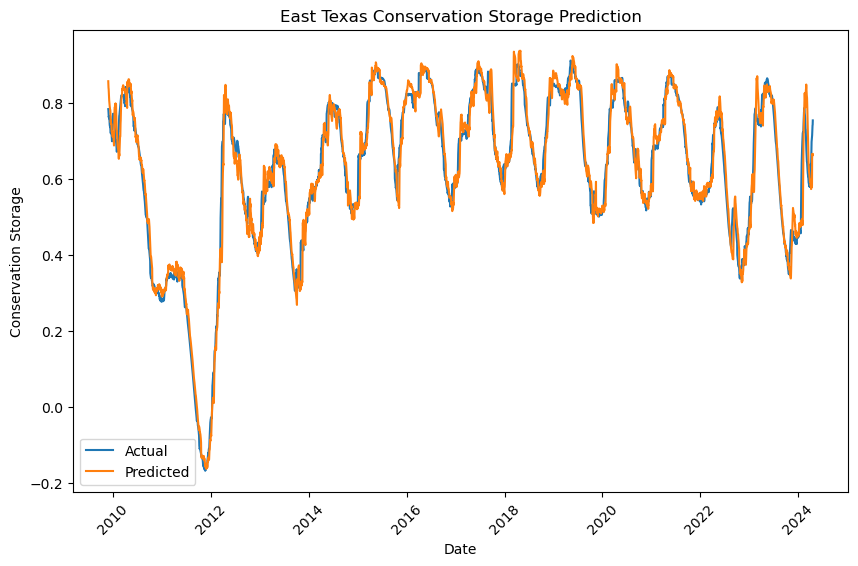

In [159]:
# create X and y, with X being the lag columns and y being the target column
X = df.drop(['conservation_storage', 'percent_full', 'conservation_capacity', 'reservoir_storage'], axis=1)
y = df['conservation_storage']

# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# split the data into training and testing sets and remain the time order
split_index = int(0.8 * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [160]:
# print mse, rmse, and r2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print mae
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Mean Absolute Error: 0.02856423736029516
Mean Squared Error: 0.0016076088141374618
Root Mean Squared Error: 0.040094997370463334
R^2: 0.963168400953523


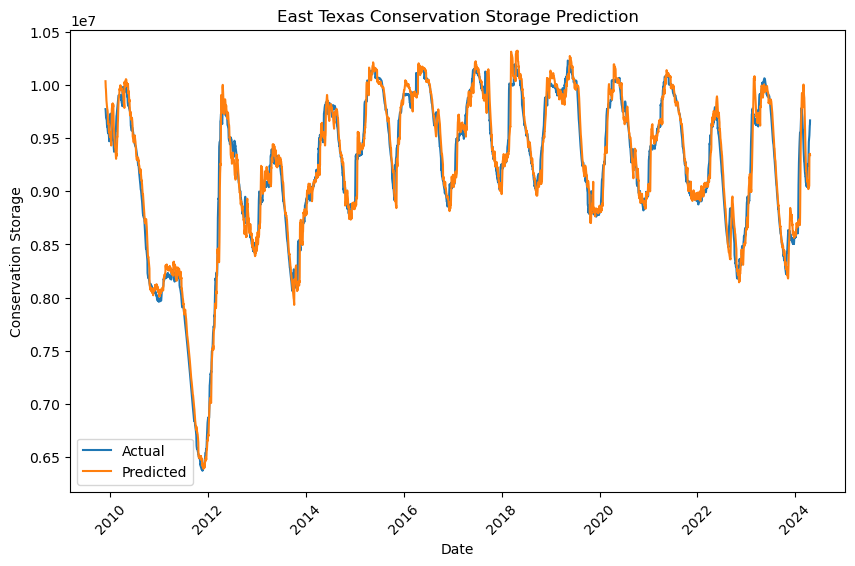

In [161]:
# convert the predictions back to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [162]:
# convert the predictions to exact values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# convert y_pred from number format of 1.23456789e+01 to 12.3456789
y_pred = np.array([float(f'{x:.2f}') for x in y_pred])

# display a dataframe with the actual and predicted values
df_pred = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten().astype(float)})
df_pred

,actual,predicted
0,9774477.0,10037496.04
1,9767609.0,9997189.79
2,9741705.0,9974782.19
3,9718544.0,9964460.35
4,9698375.0,9931410.71
...,...,...
5257,9559409.0,9335700.74
5258,9592145.0,9352482.15
5259,9620645.0,9348876.44
5260,9626325.0,9353948.59


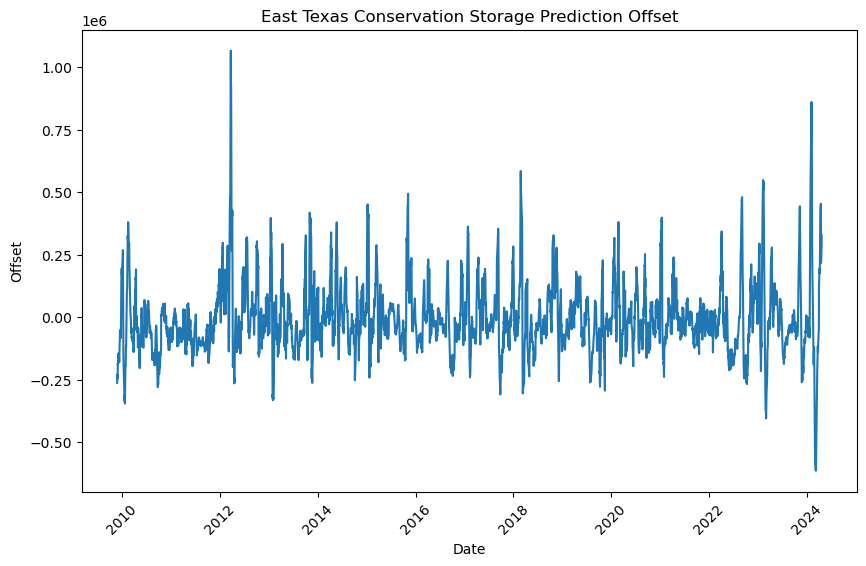

In [163]:
# plot offset between actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test - y_pred)
plt.title('East Texas Conservation Storage Prediction Offset')
plt.xlabel('Date')
plt.ylabel('Offset')
plt.xticks(rotation=45)
plt.show()

In [164]:
# train with LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten

# reshape the data
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# create the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.add(Flatten())
model.compile(optimizer='adam', loss='mse')

# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# train the model
model.fit(X_train_reshaped, y_train, epochs=1000, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# make predictions
y_pred = model.predict(X_test_reshaped)

Epoch 1/1000


C:\Users\nhkho\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1161 - val_loss: 0.0077
Epoch 2/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 3/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 4/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 5/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 6/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 7/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 8/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 9/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 10/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 11/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 12/1000
527/527 ━━━━━━━━━━━━━━━━━━━━ 

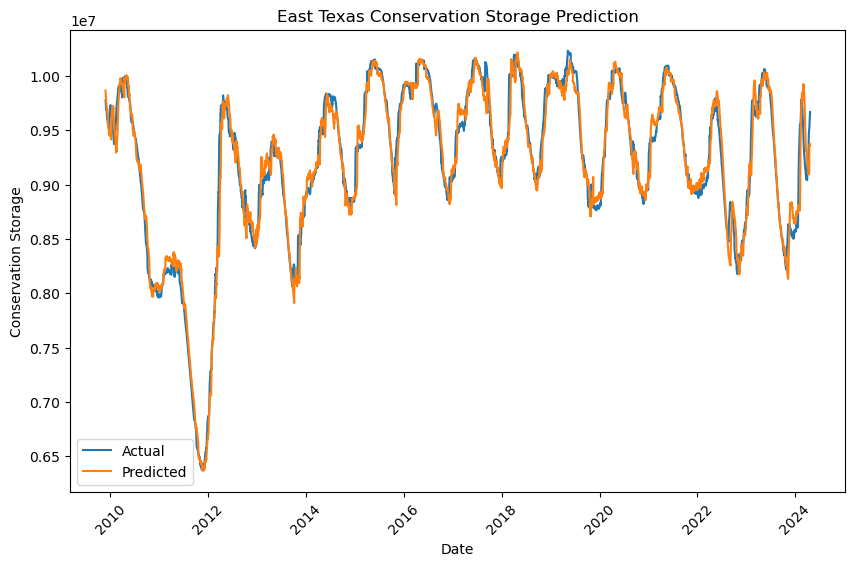

In [165]:
y_pred = scaler.inverse_transform(y_pred)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [166]:
# print mse, rmse, and r2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print mae
# mae = np.mean(np.abs(y_test - y_pred))
# print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Mean Squared Error: 19930908422.132603
Root Mean Squared Error: 141176.86928860762
R^2: 0.9642326272527967


In [167]:
# train with MLP
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# train the model
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# make predictions
y_pred = model.predict(X_test_scaled)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# print mse, rmse, and r2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print mae
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Epoch 1/1000


C:\Users\nhkho\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


492/530 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3936

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 4233
'y' sizes: 4116


In [ ]:
y_test.shape

(5291, 1)

In [ ]:
y_pred_reshaped = y_pred.reshape(y_test.shape)
y_pred_original = scaler.inverse_transform(y_pred_reshaped)

y_test_original = scaler.inverse_transform(y_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test_original, label='Actual')
plt.plot(df.index[split_index:], y_pred_original, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

ValueError: non-broadcastable output operand with shape (5291,1) doesn't match the broadcast shape (5291,199)